In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [2]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8',]
df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\incomplete\Incomplete Datasets Without Labels\PID\PID_NW_5.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8
0,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50.0
1,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31.0
2,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0
4,0.0,137.0,40.0,35.0,168.0,NaN,2.288,33.0
...,...,...,...,...,...,...,...,...
763,10.0,101.0,NaN,48.0,180.0,32.9,0.171,63.0
764,2.0,122.0,70.0,27.0,0.0,36.8,0.340,27.0
765,5.0,121.0,72.0,23.0,112.0,26.2,0.245,30.0
766,1.0,126.0,60.0,0.0,0.0,30.1,0.349,47.0


In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
float64		column 1	38
float64		column 2	19
float64		column 3	57
float64		column 4	19
float64		column 5	38
float64		column 6	95
float64		column 7	0
float64		column 8	38


In [4]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8
count,730.000000,749.000000,711.000000,749.000000,730.000000,673.000000,768.000000,730.000000
mean,3.810959,120.554072,69.167370,20.448598,81.153425,31.734770,0.471876,32.994521
std,3.325900,31.576769,19.211465,15.852734,116.622618,7.640656,0.331329,11.546291
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,99.000000,64.000000,0.000000,0.000000,27.300000,0.243750,24.000000
50%,3.000000,117.000000,72.000000,23.000000,37.500000,32.000000,0.372500,29.000000
75%,6.000000,139.000000,80.000000,32.000000,128.750000,35.800000,0.626250,40.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


<AxesSubplot:>

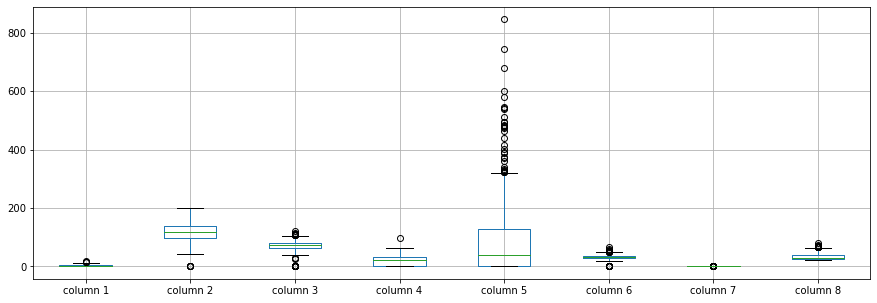

In [5]:
df.boxplot(return_type='axes', figsize=(15,5))

In [6]:
df.mean()

column 1      3.810959
column 2    120.554072
column 3     69.167370
column 4     20.448598
column 5     81.153425
column 6     31.734770
column 7      0.471876
column 8     32.994521
dtype: float64

In [7]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8
column 1,1.000000,0.126676,0.157776,-0.066213,-0.075488,0.031379,-0.029507,0.535166
column 2,0.126676,1.000000,0.156121,0.063741,0.351888,0.230769,0.150453,0.251314
column 3,0.157776,0.156121,1.000000,0.208412,0.083359,0.279460,0.044854,0.237424
column 4,-0.066213,0.063741,0.208412,1.000000,0.432637,0.370358,0.174967,-0.119647
column 5,-0.075488,0.351888,0.083359,0.432637,1.000000,0.174440,0.197222,-0.074790
column 6,0.031379,0.230769,0.279460,0.370358,0.174440,1.000000,0.116576,0.046630
column 7,-0.029507,0.150453,0.044854,0.174967,0.197222,0.116576,1.000000,0.024050
column 8,0.535166,0.251314,0.237424,-0.119647,-0.074790,0.046630,0.024050,1.000000


In [8]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [9]:
imputer = md.Midas(layer_structure = [8,8+61,8+61+61,8+61+61+61,8+61+61+61+61,8+61+61+61+61+61,8+61+61+61+61+61+61,8+61+61+61+61+61,8+61+61+61+61,8+61+61+61,8+61+61,8+61,8], vae_layer = False, seed = 8)
imputer.build_model(df)
imputer.train_model(training_epochs=100)


Size index: [8]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 408.73152414957684
Epoch: 1 , loss: 407.4739710489909
Epoch: 2 , loss: 404.91017723083496
Epoch: 3 , loss: 403.41718737284344
Epoch: 4 , loss: 400.0709234873454
Epoch: 5 , loss: 396.7910035451253
Epoch: 6 , loss: 395.2907962799072
Epoch: 7 , loss: 389.8799254099528
Epoch: 8 , loss: 386.8699951171875
Epoch: 9 , loss: 381.2324899037679
Epoch: 10 , loss: 378.4510415395101
Epoch: 11 , loss: 366.4869136810303
Epoch: 12 , loss: 366.6954409281413
Epoch: 13 , loss: 361.5394484202067
Epoch: 14 , loss: 352.10984388987225
Epoch: 15 , loss: 348.8507932027181
Epoch: 16 , loss: 337.2564951578776
Epoch: 17 , loss: 340.28808371225995
Epoch: 18 , loss: 332.42729091644287
Epoch: 19 , loss: 324.84380563100177
Epoch: 20 , loss: 320.9802401860555
Epoch: 21 , loss: 318.0959332784017
Epoch: 22 , loss: 313.9954703648885
Epoch: 23 , loss: 305.0322612126668
Epoch: 24 , loss: 306.3800226847331
Epoch: 25 , loss: 303.6304349899292


In [10]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(768, 8)

In [11]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1     8.000
column 2    99.000
column 3    84.000
column 4     0.000
column 5     0.000
column 6    35.400
column 7     0.388
column 8    50.000
Name: 21, dtype: float64

In [12]:
complete_df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\complete\Original Datasets Without Labels\PID.xlsx', header=None,names=column_names)

In [13]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8
0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0
1,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0
2,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0
3,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0
4,0.000000,0.0,0.000000,0.0,0.0,7.498602,0.0,0.0
...,...,...,...,...,...,...,...,...
763,0.000000,0.0,-75.519973,0.0,0.0,0.000000,0.0,0.0
764,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0
765,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0
766,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0


Calculating NRMSE Value

In [14]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [15]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [16]:
numerator=Frobenius_norm(new_df-complete_df)
denominator=Frobenius_norm(complete_df)
numerator, denominator

(867.7034012575261, 5776.576248839705)

In [17]:
NRMS=numerator/denominator
NRMS


0.15021067218351267

In [18]:
new_df.iloc[66,:]

column 1      0.000
column 2    109.000
column 3     88.000
column 4     30.000
column 5      0.000
column 6     32.500
column 7      0.855
column 8     38.000
Name: 66, dtype: float64

In [19]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8
0,6.000000,148.0,72.000000,35.0,0.0,33.600000,0.627,50.0
1,1.000000,85.0,66.000000,29.0,0.0,26.600000,0.351,31.0
2,8.000000,183.0,64.000000,0.0,0.0,23.300000,0.672,32.0
3,1.000000,89.0,66.000000,23.0,94.0,28.100000,0.167,21.0
4,0.000000,137.0,40.000000,35.0,168.0,50.598602,2.288,33.0
...,...,...,...,...,...,...,...,...
763,10.000000,101.0,0.480027,48.0,180.0,32.900000,0.171,63.0
764,2.000000,122.0,70.000000,27.0,0.0,36.800000,0.340,27.0
765,5.000000,121.0,72.000000,23.0,112.0,26.200000,0.245,30.0
766,1.000000,126.0,60.000000,0.0,0.0,30.100000,0.349,47.0


In [20]:
imputations[-1].to_excel("PID_NW_5.xlsx", index=False, header=False)